In [213]:
#Import modules needed for pre-processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

#Import modules needed for modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from joblib import dump
import os
from joblib import load
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier

### 1. Business Problem

Because acquiring new customers is more expensive than keeping existing ones, it is vital for banks or any business to identify unsatisfied consumers who may decide to stop using the bank's services and switch to a competitor. Bank decision-makers could reduce churn rates and increase customer loyalty by spotting clients who are likely to leave. This could be done by engaging with those customers who are likely to be churned to give them rewards and offer them customized promotions. This machine learning project intends to establish a predictive model that helps identify customers likely to churn by constructing classification models on historical bank customer data. This will assist bank decision-makers in detecting customers with a high likelihood of churning and formulating effective strategies to keep those customers.

### 2. Importing the Dataset

This dataset was found on Kaggle (https://www.kaggle.com/mathchi/churn-for-bank-customers), an open-source site to download databases to help with machine learning projects. It includes columns that all banks have on their customers which makes it perfect for this project.

In [214]:
#Import bank customres churn dataset 
df=pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [215]:
#Drop irrelivent columns with no use to the analysis
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


After removing some columns that add no value to the project (RowNumber, CustomerID & Surname) we are left with the following:

**Target Variable**\
•**Exited**: did the customer leave the bank?

**Predictors**\
•**CreditScore**: customers credit score\
•**Geography**: country customer lives in\
•**Gender**: Male of Female\
•**Age**\
•**Tenure**: how long has the customer been with the bank?\
•**Balance**: how much money is in their account?\
•**NumOfProducts**: number of products the customer has purchased through the bank\
•**HasCrCard**: does the customer have a credit card?\
•**IsActiveMember**: do they use their account often?\
•**EstimatedSalary**: banks judgment on their annual salary\

### 3. Descriptive Statistics on the Dataset

In [216]:
#Check the size and shape of the dataset
print(f'The dataset is made up of {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset is made up of 10000 rows and 11 columns.


In [217]:
#Display some information on the variables within the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [218]:
#Display some initial descriptive statistics
round(df.describe(),3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.248,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


Text(0.5, 1.0, 'Only 25.58% of Customers in the Dataset Exited')

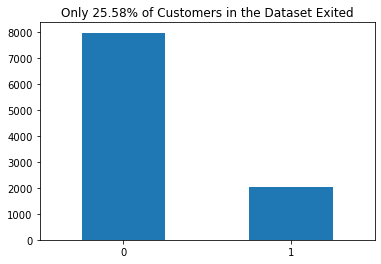

In [219]:
#Look at the level of churn within the dataset
exit_plot = df.Exited.value_counts().plot.bar(rot=0)
a = df.Exited.value_counts()[0]
b = df.Exited.value_counts()[1]
exit_plot.set_title(f'Only {round((b/a)*100,2)}% of Customers in the Dataset Exited')

Please take a moment to look over the basic descriptive statitics of the dataset above. These are purely descriptive and in no way aim to 'explore' the data as would be innapropriate before splitting into train and test segments. 

From the above descriptive statstics table we can conclude that , an equal count in all fields (10,000) indicates that there is no missing values in this dataset.Since **std** is less than **mean** in all fields this means that the data in this dataset is clustred around the mean in all given fields so the observations are not widely spread out in all coulumns. The range of  observation (Diffirence between maximum and minimum values) and also the variation between 25% , 50% and 75% of the data in the dataset is not consdirable high in most fields except of Balance and Estimated salary fileds , **this indicates that the data is aligned with no outliers**.

The main thing to take away here is that 25.58% of the instances were those of a customer who churned from the bank, this is important to note as it influences how to apply stratified sampling in the next stage. 

The average tenure with the bank is just over five years and the average age is just under 40. Over 70% of the dataset has a credit card with the bank and just over half are defined as an active memeber. The mean estimated salary for the dataset is over €100,000 which is quite high, the standard deviation here is high too indicating high veriability.

### 4. Train & Test Split

#### 4.1. Random Sampling

In [220]:
#Split into test and train via random sampling
random_train_set, random_test_set = train_test_split(df, test_size = 0.2, random_state = 7)
print(f'There are {random_train_set.shape[0]} training instances and {random_test_set.shape[0]} testing instances')

There are 8000 training instances and 2000 testing instances


In [221]:
#Examine if our target variable is evenly distributed via the use of random sampling
exit_train = random_train_set['Exited'].value_counts()[1]/random_train_set['Exited'].value_counts()[0]*100
exit_test = random_test_set['Exited'].value_counts()[1]/random_test_set['Exited'].value_counts()[0]*100
print(f' The level of churn in the training data is {round(exit_train,2)}% and in the\
test data it is {round(exit_test,2)}%')

 The level of churn in the training data is 25.51% and in thetest data it is 25.87%


#### 4.2. Stratified Sampling

In [222]:
#Use stratified split to try get a more representative train/test churn split
stratified_splitter=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
train_index ,test_index=list(stratified_splitter.split(df ,df["Exited"]))[0]
train_set=df.loc[train_index]
test_set=df.loc[test_index]

In [223]:
def Exited_cat_proportions(data):
    return data["Exited"].value_counts() / len(df)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": Exited_cat_proportions(df),
    "Random test set": Exited_cat_proportions(random_test_set),
    "Stratified test set": Exited_cat_proportions(test_set),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = df_tmp["Random test set"] / df_tmp["Overall"]
df_tmp["Strat. %error"] = df_tmp["Stratified test set"] / df_tmp["Overall"]

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
0,0.7963,0.1589,0.1593,0.199548,0.200050
1,0.2037,0.0411,0.0407,0.201767,0.199804


In [224]:
#What method of sampling generated the best results?
r_error = df_tmp['Rand. %error'].sum() 
s_error = df_tmp['Strat. %error'].sum()
print(f'The error in random sampling is {round(r_error,4)} and the error in \
stratified sampling is {round(s_error,4)}')

The error in random sampling is 0.4013 and the error in stratified sampling is 0.3999


In [225]:
exit_train_s = train_set['Exited'].value_counts()[1]/train_set['Exited'].value_counts()[0]*100
exit_test_s = test_set['Exited'].value_counts()[1]/test_set['Exited'].value_counts()[0]*100
print(f'The level of churn in our new stratified train data is {round(exit_train_s,2)}% and in our test data\
 is now {round(exit_test_s,2)}% which is marginally closer than where random sampling was used.')

The level of churn in our new stratified train data is 25.59% and in our test data is now 25.55% which is marginally closer than where random sampling was used.


***The code above details our sampling methods for this study.***

First we used random sampling which gave us 25.51% of churn in the training data compared to 25.87% in the whole dataset. This is a pretty good result from random sampling, however to make sure our modelling is as acvcurate as possible, it is always best to attempt to make our training data as representative as possible. 

Therefore we went on to also do stratified sampling using the level of churn as our important variable to minimuse the difference in. Here we were able to get a level of churn equal to 25.59% in our training data and 25.55% in our testing data. 

We then went on to run some analysis comparing the two approaches and found that the error was slightly less with the stratified sampling approach. We have therefore chosen this data split to go ahead with and begin our exploratory analysis. 

### 5. Data Exploration

Text(0.5, 1.0, 'Most Customers in the Dataset are from France\nGermans seem more likely to churn')

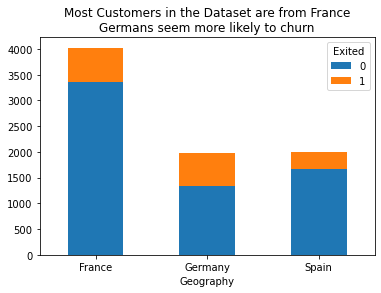

In [226]:
#Showcase the geographical data on customers
geog_churn = pd.crosstab(train_set['Geography'], train_set['Exited'])
geog_churn_plot = geog_churn.plot.bar(stacked=True,rot=0)
geog_churn_plot.set_title('Most Customers in the Dataset are from France\nGermans seem more likely to churn')

To begin our exploration, we can see that most of the training data is from France and it seems that there is some difference in churn across the three countries; It looks like more German customers churn than French and Spanish.

Text(0.5, 1.0, 'Gender Frequencies are Relitivly Even within the Dataset\nFemales leave slightly more')

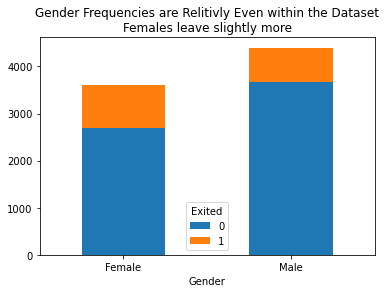

In [227]:
#Explore gender frequencies within the dataset
gender_churn = pd.crosstab(train_set['Gender'], train_set['Exited'])
gender_churn_plot = gender_churn.plot.bar(stacked=True,rot=0)
gender_churn_plot.set_title('Gender Frequencies are Relitivly Even within the Dataset\nFemales leave slightly more')

Here we can see that there are slightly more males within the training data. Females seem to churn slightly more than males, however there isn't a huge amount of variation in churn rate between the two.

Text(0.5, 1.0, 'The Large Majority of Cutomers in the Dataset have a Credit Card\nNot too much variation in level of churn')

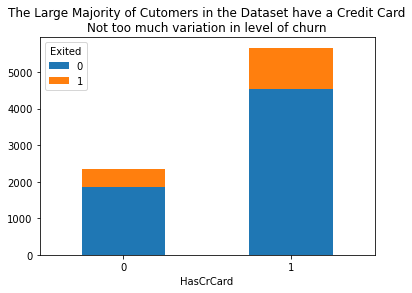

In [228]:
#Explore the level of customers in the dataset who own a credit card
card_churn = pd.crosstab(train_set['HasCrCard'], train_set['Exited'])
card_churn_plot = card_churn.plot.bar(stacked=True,rot=0)
card_churn_plot.set_title('The Large Majority of Cutomers in the Dataset have a Credit Card\nNot too much variation\
 in level of churn')

The majority of customers in the training data have a credit card with the bank. It doesn't seem to have the effect on churn as we might have thought. If anything it looks like those with a credit card leave slightly more than those without one.

Text(0.5, 1.0, 'The dataset is Evenly Split Between Active & Non-active Members \nLess likely to churn if active member')

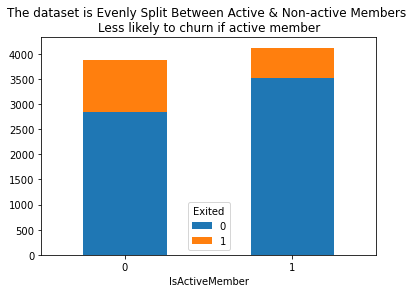

In [229]:
#look at the frequencies of active and non-active members in the dataset
active_churn_table = pd.crosstab(train_set['IsActiveMember'],train_set['Exited'])
active_churn_plot = active_churn_table.plot.bar(stacked=True, rot=0)
active_churn_plot.set_title('The dataset is Evenly Split Between Active & Non-active Members \n\
Less likely to churn if active member')

The training data is split relitively evenly between active and non-active members. As you would expect non-active members seem to churn slightly more than active customers.

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>]], dtype=object)

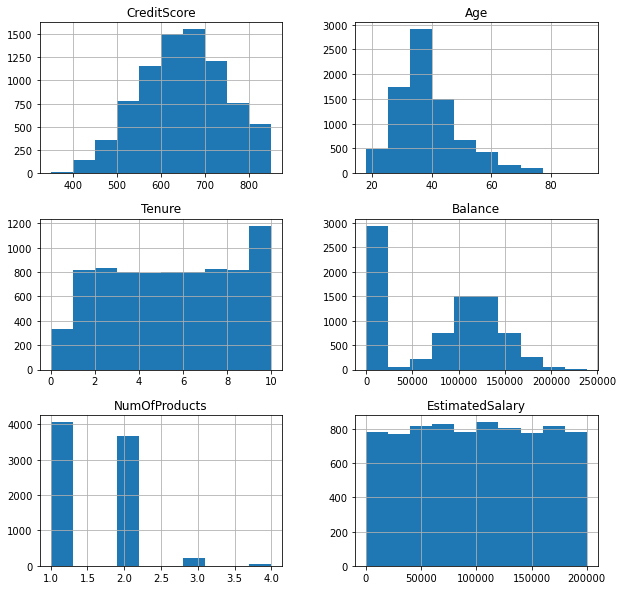

In [230]:
train_set[['CreditScore','Age','Tenure','Balance',\
         'NumOfProducts','EstimatedSalary']].hist(bins=10, figsize=(10,10))

The above matrix of histograms shows us more-or-less what we want to see across most of our continuous fields.

CreditScore, Age, Tenure & EstimatedSalary all appear normally distributed. Age is skewed slightly to the right, and tenure slightly to the left. However, nothing here is of issue to the extend that we need to alter the data.

There is a slight issue with the Balance field. As there are two groups of customers, ones with money in the bank, and ones without any, it means there is a normally distributed group in the middle, and then a cluster of customers at 0. We cannot just ignore these customers as it's about half of our dataset, and those with no money in the bank might be more likely to churn. Instead we will leave it as it is and enginieer a new variable later.

In [231]:
#Here's the Pearson's R score, useful to know, but only measures linear relationships!
cor_matrix = train_set.corr()
cor_matrix['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.283000
Balance            0.118719
EstimatedSalary    0.014987
Tenure            -0.009943
HasCrCard         -0.010808
CreditScore       -0.025217
NumOfProducts     -0.049742
IsActiveMember    -0.150441
Name: Exited, dtype: float64

In the correlation matrix above you can see that Age and Balance are the strongest positive association to churn. This means the older a customer (and the more money they have in the bank) the more likely they are to churn. On the other hand if the customer is an active member then they are less likely to churn.

It must be said that there aren't any strong relationships, all of these are weak, however they might have some predictive power when all combined in the models to come.

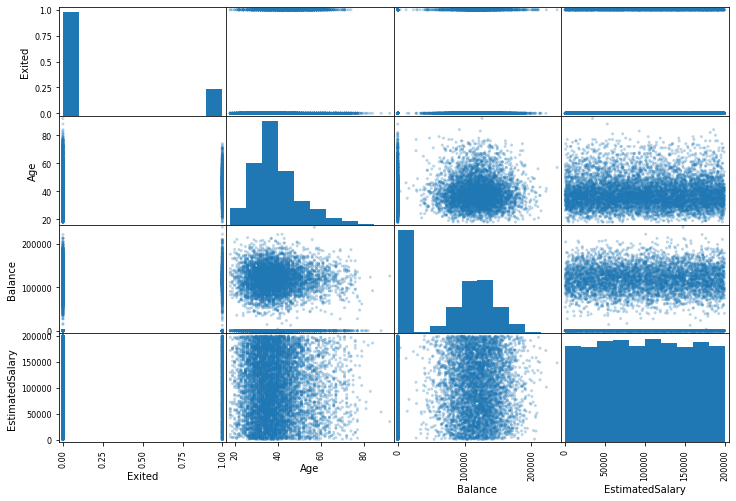

In [232]:
#Scatter Matrix (check for multicolinearity)
from pandas.plotting import scatter_matrix
attributes = ['Exited', 'Age', 'Balance', 'EstimatedSalary']
scat_matrix = scatter_matrix(train_set[attributes], figsize=(12,8), alpha=0.3)

bove is another correlation matrix, here showing how our predictors are related to eachother. This is good news as it shows no strong relationships that would indicate multicoliniarity and we therefore don't need to remove any columns.

### 6. Data Preprocessing

#### 6.1. Dealing with Missing Data

In [233]:
#Check for missing values
null_train = train_set.isnull().sum()
null_test = test_set.isnull().sum()
print(f'The training data has {null_train.sum()} missing values and the test data has {null_test.sum()} \
missing data.')

The training data has 0 missing values and the test data has 0 missing data.


There wes no missing data within our dataset which meant we didn't need to worry about imputating or removing missing values.

#### 6.2. Feature Enginnering

In [234]:
#Convert Gender variable to take binary variables only: Male=1 & Female=0
#Firt create a function that converts a gender variable (string) into a binary variable
def gender_binary (df):
    if df['Gender'] == 'Male':
        df['Gender'] = 1
    else:
        df['Gender'] = 0
    return df

#Now use the apply() function to fit this to first the train_set and then the test_set
train_set = train_set.apply(gender_binary, axis=1)
test_set = test_set.apply(gender_binary, axis=1)

#Now check that the function worked as intended
train_set['Gender'].value_counts()

1    4398
0    3602
Name: Gender, dtype: int64

In [235]:
#Now we need to convert the Geography variable into two seperate dummy variables taking binary values

one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

#The encoder can only take a 2-d numpy array so we need to convert it as such
cat_vals = train_set['Geography'].values.reshape(-1,1)

#Now we need to fit and transform the trainset
transformed = one_hot_encoder.fit_transform(cat_vals)

#Now we must convert these values back into a dataframe and return to a column in our train_set
col_names = one_hot_encoder.categories_[0].tolist()[1:]
for i, col_name in enumerate(col_names):
    train_set[col_name] = transformed[:,i]

#Test to see it worked as intended
train_set.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
7378,599,France,1,34,8,0.00,2,1,1,174196.68,0,0.0,0.0
2489,714,France,1,28,6,122724.37,1,1,1,67057.27,0,0.0,0.0
3843,783,Spain,1,38,1,0.00,3,1,1,80178.54,1,0.0,1.0
4560,624,Spain,0,36,0,0.00,2,1,0,111605.90,0,0.0,1.0
1309,591,Spain,1,30,8,124857.69,2,0,0,50485.70,0,0.0,1.0


In [236]:
#Now we must transform the test set regarding dummer georgraphy variables
cat_vals = test_set['Geography'].values.reshape(-1,1)
transformed = one_hot_encoder.transform(cat_vals)
for i, col_name in enumerate(col_names):
    test_set[col_name] = transformed[:,i]
    
#Now we must drop the original geography variable from the train and test data
train_set.drop('Geography', axis=1, inplace=True)
test_set.drop('Geography', axis=1, inplace=True)
train_set.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
7378,599,1,34,8,0.00,2,1,1,174196.68,0,0.0,0.0
2489,714,1,28,6,122724.37,1,1,1,67057.27,0,0.0,0.0
3843,783,1,38,1,0.00,3,1,1,80178.54,1,0.0,1.0
4560,624,0,36,0,0.00,2,1,0,111605.90,0,0.0,1.0
1309,591,1,30,8,124857.69,2,0,0,50485.70,0,0.0,1.0


In [237]:
#Now we need to create a new variable that is 1 Balance is Zero and 0 if not
#Firt create a function that 
def new_feature_zb (df):
    if df['Balance'] == 0:
        df['ZeroBalance'] = 1
    else:
        df['ZeroBalance'] = 0
    return df

#Now use the apply() function to fit this to first the train_set and then the test_set
train_set = train_set.apply(new_feature_zb, axis=1)
test_set = test_set.apply(new_feature_zb, axis=1)

#Now check that the function worked as intended
test_set['ZeroBalance'].value_counts()

0.0    1315
1.0     685
Name: ZeroBalance, dtype: int64

Our feature engineering is made up of three main parts (1) binary conversion, (2) dummy variable creation, and (3) new predictor creation. 

1) First we had to convert the gender variable to binary, this is because most machine learning algorithms can only read numerical data, and all perform better when all predictors are in the same format and scale. We therefore created a function and used the apply() method to make male instances 1 and female 0.

2) Next we needed to make dummy variables for the geography variable based on the same reasons as before. Here we use the OneHotEncoder() function. We first fit the model on our training data, and used that to transform the training data, and then the test data afterwards. We new have two new columns for Germany and Spain. If both are zero then this means the instance is a customer from France. 

3) Next we looked at how we can better the data itself, we know that there is a big difference between someone with €3 in their account and someone with €0 in their account. It's a difference of much more importance than two customers with €2,000 and €2,003 in their accounts. To showcase this imporatance to the model we have created a new variable which will take 1 if the customer has a balance of €0 and 0 if they have any value of money in their account.

We have already defined that there were no outliers to remove so this was not neccessary in this stage of the analsysis.

#### 6.3. Scaling

In [238]:
#Now we will use the standard scaler to standardise our predicor variables
scaler = StandardScaler()

#Seperate train data predictors and target
train_set_target = train_set['Exited'].values
train_set_predictors = train_set.drop('Exited', axis=1)

#Fit_transform returns a numpy array so we must put it back to a dataframe
scaled_vals = scaler.fit_transform(train_set_predictors)
train_set = pd.DataFrame(scaled_vals, columns=train_set_predictors.columns)

#Now we must pup the non-scaled target variable (Exited) back 
train_set['Exited'] = train_set_target

#Check the fit and transformation has worked as intended
train_set.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,ZeroBalance,Exited
0,-0.524454,0.904991,-0.475921,1.031255,-1.214708,0.807667,0.642401,0.969466,1.290892,-0.571962,-0.578120,1.314729,0.0
1,0.661770,0.904991,-1.048688,0.338440,0.753285,-0.913520,0.642401,0.969466,-0.576569,-0.571962,-0.578120,-0.760613,0.0
2,1.373504,0.904991,-0.094077,-1.393597,-1.214708,2.528854,0.642401,0.969466,-0.347863,-0.571962,1.729744,1.314729,1.0


In [239]:
#Now we must transform the test data
test_set_target = test_set['Exited'].values
test_set_predictors = test_set.drop('Exited', axis=1)
scaled_vals = scaler.transform(test_set_predictors)
test_set = pd.DataFrame(scaled_vals, columns=test_set_predictors.columns)
test_set['Exited'] = test_set_target

#Check that the transformation worked
test_set.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,ZeroBalance,Exited
0,-1.617843,-1.104983,-0.762304,-0.700782,-1.214708,-0.913520,0.642401,0.969466,1.332264,-0.571962,-0.57812,1.314729,1.0
1,1.507599,0.904991,0.001384,-0.007967,0.170004,0.807667,-1.556661,-1.031496,0.086183,1.748369,-0.57812,-0.760613,0.0
2,1.208465,-1.104983,-0.380460,0.338440,0.906089,-0.913520,0.642401,-1.031496,0.268957,1.748369,-0.57812,-0.760613,1.0


Finally, we needed to scale our data as machine learning algorithms tend to perform better when given data in the same scale. To do this we have fitter thr StandardScaler() which removes the mean and scales all the values to their unit variance. Once again, we first fitted this model on the training data and then used it to transform the training data before using it for the test data. Looking above we can confirm that this scaling process has worked as intedned and the data is now nearly ready for modelling. 

#### 6.4. Balance Classes Using SMOTE

In [240]:
#Convert these datasets into train features, train target, test features & test target
Xtrain = train_set.drop('Exited', axis=1)
Xtest = test_set.drop('Exited', axis=1)
ytrain = train_set['Exited']
ytest = test_set['Exited']

In [241]:
#Now we will use SMOTE to balance classes in the training data (i.e. those who left = those who stayed)
smote = SMOTE()
Xtrain, ytrain = smote.fit_resample(Xtrain,ytrain)

This stage is hugely important as we have balanced the level of customers within the training data who churned (Exited = 1) with the amount of customers who didn't (Exited = 0). This is needed as before only 25% of customers actually churned, meaning any algorithm would be about 25% better at predicting customers who are likely to stay and NOT customers likely to churn. We are interested with Churn, so the level of churn must be at least equal here. This is not needed in the test data, only in the data that is usedf to train our algorithms. 

### 7. Baseline Model

In [242]:
#We need this information to formulate our baseline model
churn = ytrain.value_counts()[1]
stayed = ytrain.value_counts()[0]
total = Xtrain.shape[0]

In [243]:
#Now we need to calculate precision and recall measures to derive an f-score for our baseline model
p_baseline = (stayed/total)/2
r_baseline = (stayed/stayed)/2
f_baseline = (p_baseline+r_baseline)/2
print(f'The f-score of the baseline model is {round(f_baseline,3)}. The models we make in this project MUST\
 outperform this score\nto be considered as useful.')

The f-score of the baseline model is 0.375. The models we make in this project MUST outperform this score
to be considered as useful.


This baseline model is easy to set up and simplistic. It provides a benchmark f-score that all models must out-perform. If your learning algorithm fails to out-perform the basline model, it isn't of much use at all.

### 8. Hypereter Tuning, Model Fitting & Cross Validation

#### 8.1. Linear Suport Vector Classifier

In [244]:
#First we must select the model
lsvm = LinearSVC()

#Now we need to set up the possible hyperameter combinations
param_grid = {
    'C': [0.001,0.01,0.1,1,3,5],
    'max_iter': [10000],
    'random_state': [7]
}

#Now we set up a five fold cross-validation
grid_search = GridSearchCV(lsvm, param_grid, cv=5,scoring='f1_macro',return_train_score=True)

#It's always useful to know exactly how long it takes to find the best model as this 
#will determine if we pickle the best model or not
start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f'Generated in {end} seconds.')

Generated in 22.02535104751587 seconds.


In [245]:
#After the cross validation, what were the best combination of hyperameters?
lsvm = grid_search.best_estimator_
lsvm

LinearSVC(C=0.001, max_iter=10000, random_state=7)

In [246]:
#What was the f-score of the best model?
lsvm_best = grid_search.best_score_
print(f'The best cross validation f-score was {round(lsvm_best,4)} for the \
random forest classifier model.')

The best cross validation f-score was 0.7124 for the random forest classifier model.


In [247]:
#Now we must present the cross-validation scores to check for overfitting
val_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
params = [str(x) for x in grid_search.cv_results_['params']]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(round(val_score,4), round(train_score,4), param)

0.7124 0.7111 {'C': 0.001, 'max_iter': 10000, 'random_state': 7}
0.7123 0.7116 {'C': 0.01, 'max_iter': 10000, 'random_state': 7}
0.7123 0.7118 {'C': 5, 'max_iter': 10000, 'random_state': 7}
0.7123 0.7118 {'C': 3, 'max_iter': 10000, 'random_state': 7}
0.7123 0.7118 {'C': 1, 'max_iter': 10000, 'random_state': 7}
0.7122 0.7118 {'C': 0.1, 'max_iter': 10000, 'random_state': 7}


In [248]:
#How does this model compare to the baseline?
lsvmXbaseline = lsvm_best-f_baseline
print(f'The best linear support vector model generated has an f-score that is {round(lsvmXbaseline,3)}0 \
greater than the baseline model, that is a {round(((lsvm_best-f_baseline)/f_baseline)*100,2)}% increase.')

The best linear support vector model generated has an f-score that is 0.3370 greater than the baseline model, that is a 89.97% increase.


In [249]:
#Dump the model into a folder to save for use later
dump(lsvm, 'models/lsvm-rb-clf.joblib')

['models/lsvm-rb-clf.joblib']

####  8.2. Polynominal Suport Vector Machine

In [250]:
#First we need to import the model
psvm = SVC(kernel="poly", gamma="scale", random_state=7)

#Specify hyperameters and grid combinations
param_grid = {
    'C': [0.001,0.01,0.1,1,3,5],
    'degree': [2], 
}

#Use a five fold cross-validation
grid_search = GridSearchCV(psvm, param_grid, cv=5, scoring='f1_macro', return_train_score=True)

#It's always useful to know exactly how long it takes to find the best model as this 
#will determine if we pickle the best model or not
start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f'Generated in {end} seconds.')

Generated in 239.77148485183716 seconds.


In [251]:
#What was the best combination of hyperameters?
psvm = grid_search.best_estimator_
psvm

SVC(C=5, degree=2, kernel='poly', random_state=7)

In [252]:
#What was the best f-score generated in cross-validation?
psvm_best = grid_search.best_score_
print(f'The best cross validation f-score was {round(psvm_best,4)} for the \
random forest classifier model.')

The best cross validation f-score was 0.6856 for the random forest classifier model.


In [253]:
#Now we must present the cross-validation scores to check for overfitting
val_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
params = [str(x) for x in grid_search.cv_results_['params']]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print((val_score), (train_score), param)

0.6855561094815993 0.6920482983523798 {'C': 5, 'degree': 2}
0.6855006369089754 0.6913992324439995 {'C': 3, 'degree': 2}
0.6831537838971775 0.6893603671471581 {'C': 1, 'degree': 2}
0.679146232165021 0.6815279458643839 {'C': 0.1, 'degree': 2}
0.6241211094747621 0.6272647339840443 {'C': 0.01, 'degree': 2}
0.43945308535374117 0.44204118985051644 {'C': 0.001, 'degree': 2}


In [254]:
#How does this model compare to the previous lsvm model?
psvmXbaseline = psvm_best-f_baseline
print(f'The best polynominal support vector model generated has an f-score\
that is {round((((psvm_best-lsvm_best)/lsvm_best)*100),3)}% better than the previous\nlinear support \
vector machine model.') 

The best polynominal support vector model generated has an f-scorethat is -3.766% better than the previous
linear support vector machine model.


In [255]:
#How does this model compare to the baseline model?
print(f'The best polynominal support vector model generated has an f-score that is {round(psvmXbaseline,3)} \
greater than the baseline model, \nthat is a {round(((psvm_best-f_baseline)/f_baseline)*100,2)}% increase.')

The best polynominal support vector model generated has an f-score that is 0.311 greater than the baseline model, 
that is a 82.81% increase.


In [256]:
#Dump the model into a folder to save for use later
dump(psvm, 'models/psvm-rb-clf.joblib')

['models/psvm-rb-clf.joblib']

#### 8.3. Decision Tree Classifier

In [257]:
#First we need to import the model
dtree = DecisionTreeClassifier()

#Outline the possible hyperameters
param_grid = {'max_depth': [5,7,9,10,20,30,40,50]}

#Use a five fold cross-validation
grid_search = GridSearchCV(dtree, param_grid ,cv=5, scoring='f1_macro', return_train_score=True)

#It's always useful to know exactly how long it takes to find the best model as this 
#will determine if we pickle the best model or not
start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f'Generated in {end} seconds.')

Generated in 1.7729551792144775 seconds.


In [258]:
#What was the best f-score generated in cross-validation?
dt_best = grid_search.best_score_
print(f'The best cross validation f-score was {round(dt_best,4)} for the \
random forest classifier model.')

The best cross validation f-score was 0.8248 for the random forest classifier model.


In [259]:
#What was the best combination of hyperameters?
dtree = grid_search.best_estimator_
dtree

DecisionTreeClassifier(max_depth=30)

In [260]:
#Now we must present the cross-validation scores to check for overfitting
val_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
params = [str(x) for x in grid_search.cv_results_['params']]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print((val_score), (train_score), param)

0.8247983174601323 1.0 {'max_depth': 30}
0.823296806976567 1.0 {'max_depth': 50}
0.8213244447009862 1.0 {'max_depth': 40}
0.8192368838489923 0.9950941873089605 {'max_depth': 20}
0.8174762007002807 0.868569156987985 {'max_depth': 10}
0.8134494174327613 0.8532303027800788 {'max_depth': 9}
0.80238513060118 0.820152351812451 {'max_depth': 7}
0.7814724414784833 0.7909058549728574 {'max_depth': 5}


In [261]:
#How does this model compare to the baseline model?
dtXbaseline = dt_best - f_baseline
print(f'The mean f-score generated by cross validating the random forest generator \
has an f-score that is {round(dtXbaseline,3)} greater than the baseline model, that\
is a {round(((dt_best-f_baseline)/f_baseline)*100,2)}% increase.')

The mean f-score generated by cross validating the random forest generator has an f-score that is 0.45 greater than the baseline model, thatis a 119.95% increase.


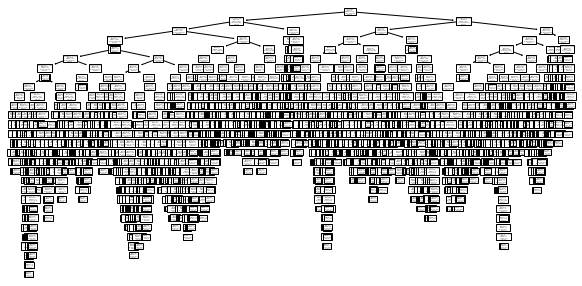

In [262]:
#Viaualise the decision tree
fig_dt = plt.figure(figsize=(10,5))
ax = plt.axes()
tree_plot = plot_tree(dtree,
                     class_names = 'Exited',
                     feature_names = list(Xtrain.columns),
                     ax=ax)

Unfortunatly we are unable to easily view each decision tree node as there are too many, with too great a depth too.

In [263]:
#Dump the model into a folder to save for use later
dump(dtree, 'models/dtree-rb-clf.joblib')

['models/dtree-rb-clf.joblib']

#### 8.4. Random Forest Generator

In [264]:
#First we need to import the model
rfc = RandomForestClassifier()

#Set up the hyperamaters to be grid-searched
param_grid = [
    {'n_estimators': [1,5,10,15,30], 'max_depth':[4,6,8,10], }
]

#Now we will run a five-fold cross validation
grid_search = GridSearchCV(rfc, param_grid ,cv=5, scoring='f1_macro', return_train_score=True)

#How long did it take to complete the cross validation?
start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f'Generated in {end} seconds.')

Generated in 8.623471975326538 seconds.


In [265]:
#What are the best hyperameters?
rfc = grid_search.best_estimator_
rfc

RandomForestClassifier(max_depth=10, n_estimators=30)

In [266]:
rfc_best = grid_search.best_score_
rfc_best

0.8431195016668911

In [267]:
#Now we must present the cross-validation scores to check for overfitting
val_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
params = [str(x) for x in grid_search.cv_results_['params']]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print((val_score), (train_score), param)

0.8431195016668911 0.8958537689257632 {'max_depth': 10, 'n_estimators': 30}
0.8374737307200096 0.8878649221479925 {'max_depth': 10, 'n_estimators': 10}
0.8368415500053563 0.8919658148376801 {'max_depth': 10, 'n_estimators': 15}
0.8281011998034409 0.8769768940776215 {'max_depth': 10, 'n_estimators': 5}
0.82340588977286 0.8540190063666561 {'max_depth': 8, 'n_estimators': 30}
0.822642776487028 0.846808074009416 {'max_depth': 8, 'n_estimators': 10}
0.8211488616037144 0.8525984658934036 {'max_depth': 8, 'n_estimators': 15}
0.8157855066602412 0.8464730238137216 {'max_depth': 8, 'n_estimators': 5}
0.8064791059987287 0.8141563149403878 {'max_depth': 6, 'n_estimators': 10}
0.8043510996125678 0.8195098335286964 {'max_depth': 6, 'n_estimators': 30}
0.8041984396545228 0.8157842809116158 {'max_depth': 6, 'n_estimators': 15}
0.7982861969834216 0.810448686013833 {'max_depth': 6, 'n_estimators': 5}
0.7917722839295476 0.7973001525825026 {'max_depth': 4, 'n_estimators': 30}
0.7830717307991103 0.79036371

In [268]:
print(f'The best cross validation f-score was {round(rfc_best,4)} for the \
random forest classifier model.')

The best cross validation f-score was 0.8431 for the random forest classifier model.


In [269]:
#How does this model compare to the baseline model?
rfcXbaseline = rfc_best - f_baseline
print(f'The mean f-score generated by cross validating the random forest generator \
has an f-score that is {round(rfcXbaseline,3)} greater than the baseline model, that\
is a {round(((rfc_best-f_baseline)/f_baseline)*100,2)}% increase.')

The mean f-score generated by cross validating the random forest generator has an f-score that is 0.468 greater than the baseline model, thatis a 124.83% increase.


In [270]:
#Dump the model into a folder to save for use later
dump(rfc, 'models/rfc-rb-clf.joblib')

['models/rfc-rb-clf.joblib']

#### 8.5. Neural Network Classification

In [271]:
#First we need to import the model
clf = MLPClassifier()

#Set up the hyperamater combinations
param_grid = [
    {'solver': ['lbfgs'], 'max_iter':[9000],
     'hidden_layer_sizes':[10,11,12,13,14,15], 'random_state':[7]}
]

#Now we will run a five-fold cross validation
grid_search = GridSearchCV(clf, param_grid ,cv=5, scoring='f1_macro', return_train_score=True)

#How long did it take to complete the cross validation?
start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f'Generated in {end} seconds.')

Generated in 94.76714301109314 seconds.


In [272]:
#What are the best hyperameters?
clf = grid_search.best_estimator_
clf

MLPClassifier(hidden_layer_sizes=14, max_iter=9000, random_state=7,
              solver='lbfgs')

In [273]:
clf_best = grid_search.best_score_
print(f'The best cross validation f-score was {round(clf_best,4)} for the \
random forest classifier model.')

The best cross validation f-score was 0.8069 for the random forest classifier model.


In [274]:
#Now we must present the cross-validation scores to check for overfitting
val_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']
params = [str(x) for x in grid_search.cv_results_['params']]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print((val_score), (train_score), param)

0.8068723669110153 0.8248775599268289 {'hidden_layer_sizes': 14, 'max_iter': 9000, 'random_state': 7, 'solver': 'lbfgs'}
0.8055040302269466 0.8221280616788142 {'hidden_layer_sizes': 13, 'max_iter': 9000, 'random_state': 7, 'solver': 'lbfgs'}
0.8037343981339096 0.8186549564161172 {'hidden_layer_sizes': 12, 'max_iter': 9000, 'random_state': 7, 'solver': 'lbfgs'}
0.8016791065733846 0.811366843466397 {'hidden_layer_sizes': 10, 'max_iter': 9000, 'random_state': 7, 'solver': 'lbfgs'}
0.8004124166100249 0.8229697167764203 {'hidden_layer_sizes': 15, 'max_iter': 9000, 'random_state': 7, 'solver': 'lbfgs'}
0.7972585464866994 0.8109757254554572 {'hidden_layer_sizes': 11, 'max_iter': 9000, 'random_state': 7, 'solver': 'lbfgs'}


In [275]:
#How does this model compare to the baseline model?
clfXbaseline = clf_best - f_baseline
print(f'The mean f-score generated by cross validating the random forest generator \
has an f-score that is {round(clfXbaseline,3)} greater than the baseline model, that\
is a {round(((clf_best-f_baseline)/f_baseline)*100,2)}% increase.')

The mean f-score generated by cross validating the random forest generator has an f-score that is 0.432 greater than the baseline model, thatis a 115.17% increase.


In [276]:
#Dump the model into a folder to save for use later
dump(clf, 'models/clf-rb-clf.joblib')

['models/clf-rb-clf.joblib']

#### 8.5. Training Conclusion

The f-score results for all our machine learning models after cross-validation and hyperameter tuning are as follows:

* Random Forrest - 0.8461
* Decision Tree  - 0.8166
* Neural Network - 0.8154
* Linear SVM     - 0.7118
* Poly SVM       - 0.6861

As we can see the randem forest, decision tree and neural network algorithms performed better than both SVM models during cross validation. This being said ALL models significantly out performed the baseline model which had an f-score of 0.375. Regardless of this, we can see that some models work better than others and we will therefore only use the random forest, decision tree and neural network models forward to the testing stage of this project. 

Why might decision tree's & nearal network's out-perform SVM's?

• Decision tree models split up data into smaller subgroups, allowing for more comprahensive analysis

• Maybe we didn't set up the optimal hyperamiter combinations for the SVM's 

• There's no set practice to what models perform better on what datasets. Sometimes a dataset will suit SVM's, and sometimes not.

### 9. Evaluating on Test Data Performance

#### 9.1. Decision Tree Evaluation

In [277]:
#Firt we need to load the pickled decision tree model from earlier
dt_model = load('models/dtree-rb-clf.joblib')

#Now we need to use this model to predict our testing data
dt_yhat = dt_model.predict(Xtest)

#Now we must calculate the models f-score
p, r, dtree_score, s = precision_recall_fscore_support(ytest,dt_yhat, average='macro')
print(f'The dicision tree model achieved an f-score of {round(dtree_score,4)} when used to predict churn \
in the training data.')

The dicision tree model achieved an f-score of 0.6762 when used to predict churn in the training data.


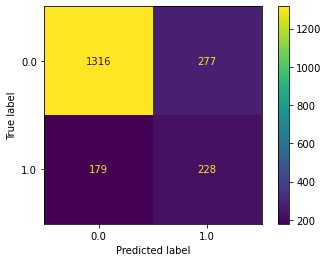

In [278]:
#Now it's useful to plot a confusion matrix
dt_cm = plot_confusion_matrix(dt_model, Xtest, ytest)

In [279]:
confusion_matrix_DT = confusion_matrix(ytest, dt_yhat)
dt_percent = ((confusion_matrix_DT[0][0]+confusion_matrix_DT[1][1])/2000)*100
print(f'The decision tree model sucessfully predicted \
{round(dt_percent,2)}% of the test data correctly.')

The decision tree model sucessfully predicted 77.2% of the test data correctly.


In [280]:
#How does this model compare to the baseline model?
dt_modelXbaseline = dtree_score - f_baseline
print(f"The f-score generated from predicting our test data's target variable \
is {round(dt_modelXbaseline,3)} greater than the baseline model, that \
is a {round(((dtree_score-f_baseline)/f_baseline)*100,2)}% increase.")

The f-score generated from predicting our test data's target variable is 0.301 greater than the baseline model, that is a 80.31% increase.


#### 9.2. Random Forest Evaluation

In [281]:
#Firt we need to load the pickled random forest model from earlier
rfc_model = load('models/rfc-rb-clf.joblib')

#Now we need to use this model to predict our testing data
rfc_yhat = rfc_model.predict(Xtest)

#Now we must calculate the models f-score
p, r, rfc_score, s = precision_recall_fscore_support(ytest,rfc_yhat, average='macro')
print(f'The random forest classifier acheived an f-score of {round(rfc_score,4)} when used to predict churn \
in the test data.')

The random forest classifier acheived an f-score of 0.7693 when used to predict churn in the test data.


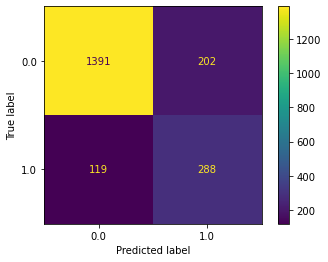

In [282]:
#Now it's useful to plot a confusion matrix
rfc_cm = plot_confusion_matrix(rfc_model, Xtest, ytest)

In [283]:
confusion_matrix_rfc = confusion_matrix(ytest, rfc_yhat)
rfc_percent = ((confusion_matrix_rfc[0][0]+confusion_matrix_rfc[1][1])/2000)*100
print(f'The random forest classifier model sucessfully predicted {round(rfc_percent,2)}% of the test data correctly. \
\nThat is {round(rfc_percent-dt_percent,2)}% more than the deicion tree classifier achieved on the same test data.')

The random forest classifier model sucessfully predicted 83.95% of the test data correctly. 
That is 6.75% more than the deicion tree classifier achieved on the same test data.


In [284]:
#How does this model compare to the baseline model?
rfc_modelXbaseline = rfc_score - f_baseline
print(f"The f-score generated from predicting our test data's target variable (churn) \
is {round(rfc_modelXbaseline,3)} greater than the baseline\nmodel, that \
is a {round(((rfc_score-f_baseline)/f_baseline)*100,2)}% increase.")

The f-score generated from predicting our test data's target variable (churn) is 0.394 greater than the baseline
model, that is a 105.16% increase.


#### 9.3. Neural Network Classifier Evaluation

In [285]:
#Firt we need to load the pickled decision tree model from earlier
clf_model = load('models/clf-rb-clf.joblib')

#Now we need to use this model to predict our testing data
clf_yhat = clf_model.predict(Xtest)

#Now we must calculate the models f-score
p, r, clf_score, s = precision_recall_fscore_support(ytest,clf_yhat, average='macro')
print(f'The neural network achieved an f-score of {round(clf_score,4)} when used to predict churn \
in the training data.')

The neural network achieved an f-score of 0.7287 when used to predict churn in the training data.


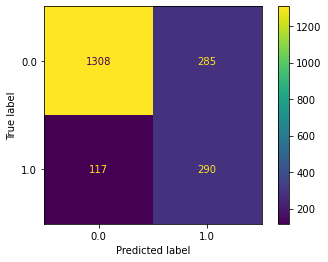

In [286]:
#Now it's useful to plot a confusion matrix
clf_cm = plot_confusion_matrix(clf_model, Xtest, ytest)

In [287]:
confusion_matrix_clf = confusion_matrix(ytest, clf_yhat)
clf_percent = ((confusion_matrix_clf[0][0]+confusion_matrix_clf[1][1])/2000)*100
print(f'The neural network model sucessfully predicted {round(clf_percent,2)}% of the test data correctly. \
\nThat is {round(clf_percent-rfc_percent,2)}% more than the deicion tree classifier achieved on the same test data.')

The neural network model sucessfully predicted 79.9% of the test data correctly. 
That is -4.05% more than the deicion tree classifier achieved on the same test data.


In [288]:
#How does this model compare to the baseline model?
clf_modelXbaseline = clf_score - f_baseline
print(f"The f-score generated from predicting our test data's target variable (churn) \
is {round(clf_modelXbaseline,3)} greater than the baseline\nmodel, that \
is a {round(((clf_score-f_baseline)/f_baseline)*100,2)}% increase.")

The f-score generated from predicting our test data's target variable (churn) is 0.354 greater than the baseline
model, that is a 94.32% increase.


#### 9.4. Testing Conclusion

The Random Forrest Classifier model generated the highest f-score on the test data of 0.7693 and was able to predict 288 out of 407 instances of churn correctly. However, dispite having a slightly lower f-score of 0.7287, the Neural Network Classifier was able to predict 290/407 instances of churn correctly. The lower f-score being because the neural network produced 83 more false-churn isntances where churn was predicted in a customer who stayed at the bank. 

Both models are appropriate but what is best depends on the company objectives. Is the aim to predict shurn at all costs? If so then the Nueral Nework Classifier is best. Is the goal to predict churn in a more conservative way to ensure fewer false-churn instances? If so then the Random Forest Classifier is the best algorithm to deploy.

#### 9.5. Possible Scenarios for Real-world Business Deployment

This data could be used for any bank operating in Europe as follows:

1) Marketing teams can use customer databases as instances for the model to predict churn. They could target the customers predicted as likely to churn with better deals and promotions to encorage them to stay, helping to maintain business revenue.

2) Using the decision trees within the decision tree and random forest models banks could form a questionnaire to predict churn in customers that they don't have data on.

3) Large investment firms might want to invest in or in some cases buy out a smaller bank. They could use this algorithm to predict churn levels of their customers. If the churn predicted is high then the valuation of the bank will fall. If the churn prediction is low then the valuation increases.

#### 9.6. Possible Challanges in Deployment

1) Need to create a function that automatically scales inputted data for the algorithm to work.

2) Staff members might want to go with their 'gut' when predicting churn.

3) **Model degredation**: result of a data drift/changes in the environment meaning the model must be retrained with new data. 